# Projet final : Santinelli Emma

### Présentation des données

Nous allons étudier des données sur des cyclistes de Seattle. Le but de se projet est de d'extraire le maximum d'informations de ces données, sans faire aucunes hypothèses de modèle. Nous allons donc faire de la statistique descriptive sur ces données.

Nous commencons par charger ces données qui porte sur le nombre de passage par heure de vélo sur le pont Fremont de Seattle. 

In [1]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4248k    0 4248k    0     0   862k      0 --:--:--  0:00:04 --:--:--  862k


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set()

Nous commençons par importer les données à l'aide du module "Pandas" et permuter les colonnes.

In [32]:
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)

In [4]:
data.head(15)

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
2012-10-03 05:00:00,31.0,21.0,10.0
2012-10-03 06:00:00,155.0,105.0,50.0
2012-10-03 07:00:00,352.0,257.0,95.0
2012-10-03 08:00:00,437.0,291.0,146.0


Ce tableau nous donne plusieurs informations : le nombre total de vélo passés sur le pont de Fremont, le nombre passé sur le coté Est du pont, et celui passé sur le cotè West. 
Par exemple, le 3 Octobre 2012 à 2h, il y a eu 2 vélos qui sont passés sur le pont, dont 1 par le coté Est et un par le coté Ouest.

In [5]:
data.describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,136313.000000,136313.000000,136313.000000
mean,112.975065,51.514060,61.461005
std,143.607191,66.214446,89.406687
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


In [33]:
print(data.loc[data['Fremont Bridge Total']==1097.000000])

                     Fremont Bridge Total  Fremont Bridge East Sidewalk  \
Date                                                                      
2019-06-11 17:00:00                1097.0                         247.0   
2019-06-11 17:00:00                1097.0                         247.0   

                     Fremont Bridge West Sidewalk  
Date                                               
2019-06-11 17:00:00                         850.0  
2019-06-11 17:00:00                         850.0  


In [34]:
print(data.loc[data['Fremont Bridge Total']==0])

                     Fremont Bridge Total  Fremont Bridge East Sidewalk  \
Date                                                                      
2012-11-01 03:00:00                   0.0                           0.0   
2012-11-23 01:00:00                   0.0                           0.0   
2012-11-23 03:00:00                   0.0                           0.0   
2012-11-26 02:00:00                   0.0                           0.0   
2012-12-02 03:00:00                   0.0                           0.0   
...                                   ...                           ...   
2020-09-27 20:00:00                   0.0                           0.0   
2020-09-28 01:00:00                   0.0                           0.0   
2020-09-28 03:00:00                   0.0                           0.0   
2020-09-29 01:00:00                   0.0                           0.0   
2020-09-30 03:00:00                   0.0                           0.0   

                     Fre

Nous sommes donc en présence de 136334 données d'heures d'observation. En moyenne, 113 vélos passent sur ce pont par heure depuis 2012, dont 51 par le côté Est et 61 par le côté Ouest.
Le maximum du nombre de vélo passés en une heure sur ce pont est de 1097 le 11 Juillet 2019 à 17h.

On se propose de renommer les deux colonnes par des abréviations : "Total", "West" et "East". On remarque que le nombre total de vélos passés sur le pont est la somme du nombre de vélos passés par le côté et Est et le nombre passés par le côté Ouest

In [7]:
data.columns = ['Total','East', 'West']
data.fillna(0, inplace=True)
data.head(15)

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
2012-10-03 05:00:00,31.0,21.0,10.0
2012-10-03 06:00:00,155.0,105.0,50.0
2012-10-03 07:00:00,352.0,257.0,95.0
2012-10-03 08:00:00,437.0,291.0,146.0


In [10]:
data=data[['West','East','Total']]
print(data)

                      West  East  Total
Date                                   
2012-10-03 00:00:00    9.0   4.0   13.0
2012-10-03 01:00:00    6.0   4.0   10.0
2012-10-03 02:00:00    1.0   1.0    2.0
2012-10-03 03:00:00    3.0   2.0    5.0
2012-10-03 04:00:00    1.0   6.0    7.0
...                    ...   ...    ...
2020-09-30 19:00:00  105.0  51.0  156.0
2020-09-30 20:00:00   43.0  27.0   70.0
2020-09-30 21:00:00   23.0  17.0   40.0
2020-09-30 22:00:00   13.0  10.0   23.0
2020-09-30 23:00:00   13.0   4.0   17.0

[136334 rows x 3 columns]


Afin d'avoir une idée globale des données, nous traçons un graphique représentant le nombre de vélos total par jour passant sur le pont en fonction des mois.

In [41]:
import matplotlib.pyplot as plt
import seaborn; 
seaborn.set() 
import numpy as np

data('Total').plot()
plt.ylabel('weekly trips');

TypeError: 'DataFrame' object is not callable

On constate qu'il y a un pic au mois de Juillet 2014. De plus, on voit qu'il y a une variation du nombre de cyclistes en fonction de la saison : lors de l'hiver il y a moins de 15000 vélos par jour qui passent sur ce pont (avec un minimum de 4500 atteint en Janvier 2014), alors qu'en été ils sont plus de 20000 par jour. Cette tendance saisonnière peut s'expliquer par les conditions climatiques, météorologiques.

### Transformation des données

Dans le but d'analyser au mieux ces données, nous allons les tranformer. En effet, nous allons réunir chaque donnée collectée pour le même jour dans une ligne en fonction de son heure. Nous allons ainsi avoir une matrice a deux diimensions: la première pour les vélos arrivant par le côté Est, et la deuxième pour ceux arrivant par le côté Ouest. Chaque ligne de cette matrice correspond à un jour de l'année et chaque colonne correspond a une heures de la journée (pour un total de 48 heures).
Voici un apperçu des données obtenues aprés transformation: 

In [11]:
pivoted = data.pivot_table(['East', 'West'],
                           index=data.index.date,
                           columns=data.index.hour,
                           fill_value=0)
pivoted.head()

East                                       ... West                 \
Date         0   1  2  3  4   5    6    7    8    9   ...   14   15   16   17   
2012-10-03    4   4  1  2  6  21  105  257  291  172  ...   51   92  182  391   
2012-10-04    7   3  3  0  7  15   91  230  284  147  ...   56   74  161  353   
2012-10-05    4   4  4  2  7  18   68  218  251  131  ...   62   84  190  290   
2012-10-06    8  10  7  1  4   3   12   17   58   59  ...  114   96   76   73   
2012-10-07    6  12  2  4  1   6    9   14   43   67  ...  115  109   93   73   

                                      
Date         18   19  20  21  22  23  
2012-10-03  258   69  51  38  25  12  
2012-10-04  241  107  56  39  21  30  
2012-10-05  209   73  41  31  26  16  
2012-10-06   55   38  18  15  20  19  
2012-10-07   45   23  36  35   9  11  

[5 rows x 48 columns]

In [12]:
pivoted.shape

(2920, 48)

On se propose d'extraire les valeurs de chaque ligne et de les stocker dans X. 

In [13]:
X = pivoted.values
X.shape

(2920, 48)

Nous sommes maintenant en présence d'un jeu de données consitué de 2920 jours et 48 variables (les 48 heures d'une journée).

### Visualisation des données

Nous pouvons penser que ces données représentent 2920 objets distincts qui vivent dans un espace de dimension 48, ou la valeur de chaque dimension est le nombre de vélos compté à une heure particulière sur une partie du pont (Est ou Ouest). Cependant, cette visualisation en 48 dimensions rendrait nos données difficilement visualisable. C'est pourquoi nous faisons le choix d'utiliser une technique de reduction de dimension qui utilise la méthode de l'analyse en composante principale (ACP). Cette méthode est une projection linéaire des données qui preserve le maximum de variance. Pour nos données, nous choisissons de garder 90% de la variance totale.

In [14]:
from sklearn.decomposition import PCA
Xpca = PCA(0.9).fit_transform(X)
Xpca.shape

(2920, 3)

Nous sommes maintenant en présence d'un objet à 3 dimensions, ce qui signifie que ces trois composantes projetées decrivent au moins 90% de la variance totale des données. Maintenant que nous avons des données en trois dimensions, nous pouvons plus facilement les représenter dans un graphique. 

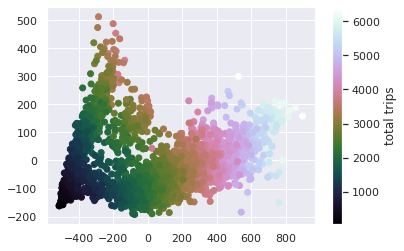

In [15]:
total_trips = X.sum(1)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=total_trips,
            cmap='cubehelix')
plt.colorbar(label='total trips');

Sur ce graphique, chaque point est coloré en fonction du nombre total de vélos par jour compté. Ainsi, plus le point est clair et plus le nombre de vélo compté ce jour est grand. On voit que les données se séparent en deux groupes distincts et que le nombre de vélo compté augmente en fonction de la longueur de de chaque composante.
Enfin, les deux groupes sont de moins en moins dissociable lorsque le nombre de vélo diminue.

### Classification non supervisée des données

Nous aimerions maintenant séparer les deux groupes que nous avons trouvé plus haut. Pour celà, nous allons utiliser l'algorithme de mélange gaussien. Nous allons appliquer ce modèle à nos données de cyclistes et représenter graphiquement le résultat obtenu.

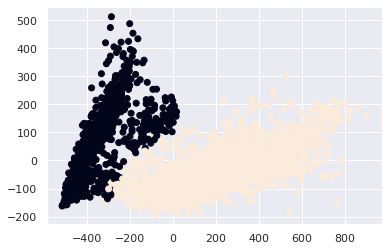

In [16]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2, covariance_type='full', random_state=0)
gmm.fit(Xpca)
cluster_label = gmm.predict(Xpca)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=cluster_label);

Notre classification semble avoir fonctionné et séparé les deux groupes que nous avions repérés sur le graphique précedent.
Nous appliquons cette classification a notre tableau de données et nous obtenons un aperçcu de celle-ci.

In [17]:
pivoted['Cluster'] = cluster_label
data = data.join(pivoted['Cluster'], on=data.index.date)
data.head()

,West,East,Total,Cluster
Date,,,,
2012-10-03 00:00:00,9.0,4.0,13.0,1
2012-10-03 01:00:00,6.0,4.0,10.0,1
2012-10-03 02:00:00,1.0,1.0,2.0,1
2012-10-03 03:00:00,3.0,2.0,5.0,1
2012-10-03 04:00:00,1.0,6.0,7.0,1


In [71]:
by_hour = data.groupby(['Cluster', data.index.time]).mean()
by_hour.head()

West      East      Total
Cluster                                        
0       00:00:00  8.312780  5.907509  14.220288
        01:00:00  4.545500  3.648434   8.193933
        02:00:00  2.841372  2.489806   5.331179
        03:00:00  1.576827  1.539035   3.115863
        04:00:00  2.184983  1.696171   3.881154

In [ ]:
Nous finissons cette partie en traçant l

### Les habitudes de travail à Seattle

Nous allons entrer plus dans les détails et essayer de voir comment nous pouvons extraire des informations sur les habitudes de travail des habitants de Seattle à partir des données que nous disposons.
Dans un premier temps, notre intuition nous suggère que ces trois classes de . Nous allons 

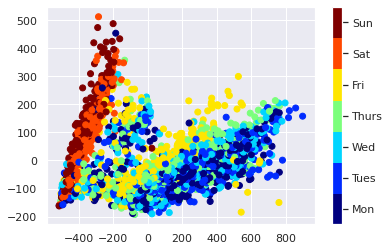

In [20]:
dayofweek = pd.to_datetime(pivoted.index).dayofweek
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=dayofweek,
            cmap=plt.cm.get_cmap('jet', 7))
cb = plt.colorbar(ticks=range(7))
cb.set_ticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.clim(-0.5, 6.5);

f

In [21]:
results = pd.DataFrame({'cluster': cluster_label,
                        'is_weekend': (dayofweek > 4),
                        'weekday': pivoted.index.map(lambda x: x.strftime('%a'))},
                       index=pivoted.index)
results.head()

,cluster,is_weekend,weekday
2012-10-03,1,False,Wed
2012-10-04,1,False,Thu
2012-10-05,1,False,Fri
2012-10-06,0,True,Sat
2012-10-07,0,True,Sun


In [25]:
weekend_workdays = results.query('cluster == 1 and is_weekend')
len(weekend_workdays)

1

In [24]:
midweek_holidays = results.query('cluster == 0 and not is_weekend')
len(midweek_holidays)

252

Il y a donc 30 weekends au cours des années précedentes durant lesquels les cyclistes de Seattle ne sont pas allés travailler. Afin de faire le lien avec les fêtes et vacances nationales, nous allons charger le calendrier officiel des vacances aux Etats Unis.

In [28]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016', return_name=True)
holidays.head()

2012-01-02                 New Years Day
2012-01-16    Martin Luther King Jr. Day
2012-02-20                Presidents Day
2012-05-28                  Memorial Day
2012-07-04                      July 4th
dtype: object

Afin de compléter ces données, nous ajoutons à chaque jour de cette liste, le jour d'avant et celui d'aprés. Voici la nouvelle liste obtenue :

In [29]:
holidays_all = pd.concat([holidays,
                         "Day Before " + holidays.shift(-1, 'D'),
                         "Day After " + holidays.shift(1, 'D')])
holidays_all = holidays_all.sort_index()
holidays_all.head()

2012-01-01                 Day Before New Years Day
2012-01-02                            New Years Day
2012-01-03                  Day After New Years Day
2012-01-15    Day Before Martin Luther King Jr. Day
2012-01-16               Martin Luther King Jr. Day
dtype: object

In [32]:
holidays_all.name = 'name'  # required for join
joined = midweek_holidays.join(holidays_all)
set(joined['name'])

NameError: name 'midweek_holidays' is not defined

### Que ce passe-t-il les Vendredis? 

On peut voir ce phénomène plus facilement en surlignant les points correspodants aux vendredis sur le graphique.

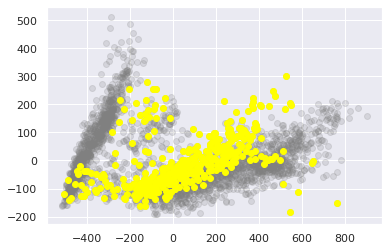

In [26]:
fridays = (dayofweek == 4)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c='gray', alpha=0.2)
plt.scatter(Xpca[fridays, 0], Xpca[fridays, 1], c='yellow');

Les points jaune sont éparpillés un peu partout sur le graphique. Nous portons une attention particulière aux trois vendredis situés aprés 600 sur l'axe des abscisses.

In [29]:
weird_fridays = pivoted.index[fridays & (Xpca[:, 0] > 600)]
weird_fridays

Index([2014-05-16, 2017-05-19, 2018-05-18], dtype='object')

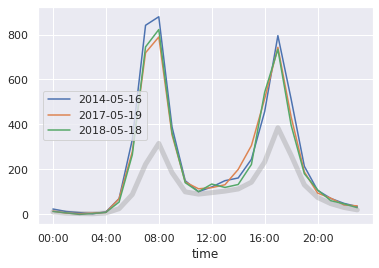

In [30]:
all_days = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
all_days.loc[:, weird_fridays].plot();
all_days.mean(1).plot(color='gray', lw=5, alpha=0.3,
                      xticks=hourly_ticks);

## Conclusion :

Après avoir analysé et décrit statistiquement les données sur le nombre de vélos qui passent sur le pont Fermond ainsi que utiliser des méthodes de classification non supervisée, nous avons dégager certaines informations sur celles-ci. 
En effet, nous avons appris sur les habitudes de travail des habitants de Seattle qui passent en vélo sur le pont Fermond pour aller au travail.
En résumé, nous avons appris que : 

* Les cyclistes de Seattle ont tendance a poser un jour de congé pour les fêtes nationales telles que : le nouvel an, Thanksgiving, le jour de Noël, le jour de la fête d'indépendance et le Memorial Day.
* Les cyclistes de Seattle ont tendance a aller travailler les jours de fête nationale moins communes telles que : le jour de Columbus, le jour de Martin Luther King Jr., le jour des présidents, le jour des vétérans.
* Les cyclistes de Seattle font leur maximum pour ne pas être retenu au travail pendant le week-end.